<a href="https://colab.research.google.com/github/wesley0521/kaggle/blob/main/Kaggle-Santander%20Customer%20Transaction%20Prediction-DNN(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 引入這部份會使用到的套件
import pandas as pd
import numpy as np
Dataset = pd.read_csv("train.csv")
# 看前五筆資料
Dataset.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., ID_code) 的缺失值有0筆
第2個欄位(i.e., target) 的缺失值有0筆
第3個欄位(i.e., var_0) 的缺失值有0筆
第4個欄位(i.e., var_1) 的缺失值有0筆
第5個欄位(i.e., var_2) 的缺失值有0筆
第6個欄位(i.e., var_3) 的缺失值有0筆
第7個欄位(i.e., var_4) 的缺失值有0筆
第8個欄位(i.e., var_5) 的缺失值有0筆
第9個欄位(i.e., var_6) 的缺失值有0筆
第10個欄位(i.e., var_7) 的缺失值有0筆
第11個欄位(i.e., var_8) 的缺失值有0筆
第12個欄位(i.e., var_9) 的缺失值有0筆
第13個欄位(i.e., var_10) 的缺失值有0筆
第14個欄位(i.e., var_11) 的缺失值有0筆
第15個欄位(i.e., var_12) 的缺失值有0筆
第16個欄位(i.e., var_13) 的缺失值有0筆
第17個欄位(i.e., var_14) 的缺失值有0筆
第18個欄位(i.e., var_15) 的缺失值有0筆
第19個欄位(i.e., var_16) 的缺失值有0筆
第20個欄位(i.e., var_17) 的缺失值有0筆
第21個欄位(i.e., var_18) 的缺失值有0筆
第22個欄位(i.e., var_19) 的缺失值有0筆
第23個欄位(i.e., var_20) 的缺失值有0筆
第24個欄位(i.e., var_21) 的缺失值有0筆
第25個欄位(i.e., var_22) 的缺失值有0筆
第26個欄位(i.e., var_23) 的缺失值有0筆
第27個欄位(i.e., var_24) 的缺失值有0筆
第28個欄位(i.e., var_25) 的缺失值有0筆
第29個欄位(i.e., var_26) 的缺失值有0筆
第30個欄位(i.e., var_27) 的缺失值有0筆
第31個欄位(i.e., var_28) 的缺失值有0筆
第32個欄位(i.e., var_29) 的缺失值有0筆
第33個欄位(i.e., var_30) 的缺失值有0筆
第34個欄位(i.e., var_31) 的缺失值有0筆
第35個欄位(i.e., var_32) 的缺失值有0筆
第36

In [4]:
# 引入這部份會用到的套件
import matplotlib.pyplot as plt

In [5]:
print(Dataset["ID_code"])

# 評估後需要 drop 掉
Dataset = Dataset.drop(["ID_code"], axis=1)

0              train_0
1              train_1
2              train_2
3              train_3
4              train_4
              ...     
199995    train_199995
199996    train_199996
199997    train_199997
199998    train_199998
199999    train_199999
Name: ID_code, Length: 200000, dtype: object


target
0    179902
1     20098
Name: count, dtype: int64


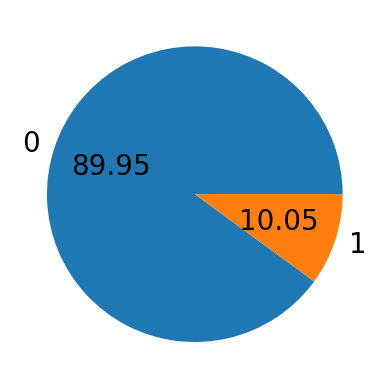

In [6]:
print(Dataset["target"].value_counts())
plt.rcParams["font.size"]=20
plt.pie(Dataset["target"].value_counts(), labels=["0", "1"],autopct="%.2f")
plt.show()

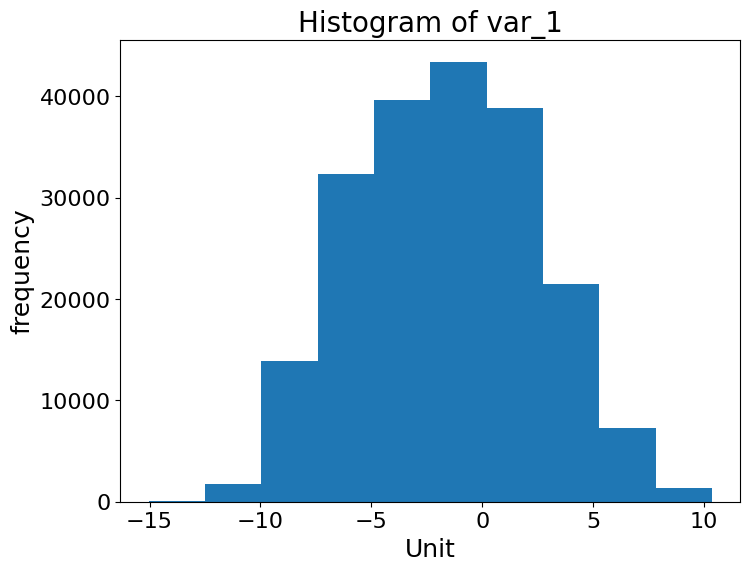

In [8]:
plt.figure(figsize=(8,6))
plt.hist(Dataset["var_1"], bins=10)
plt.title("Histogram of var_1", fontsize=20)
plt.xlabel("Unit", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

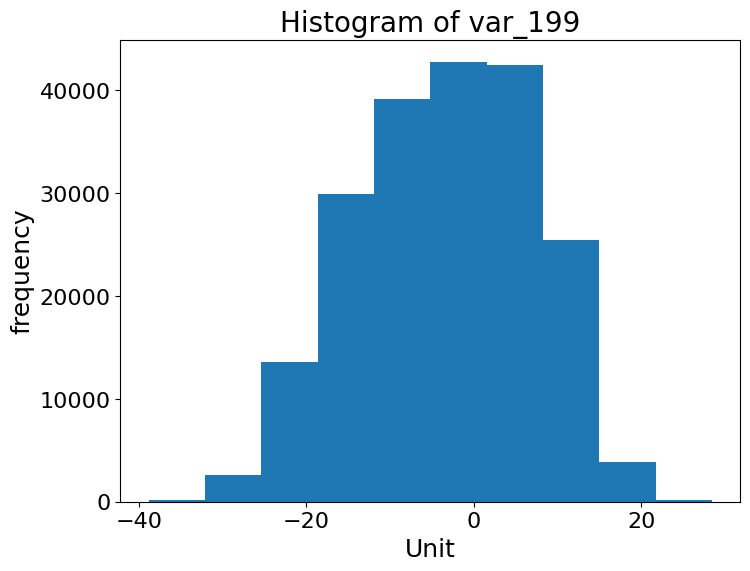

In [9]:
plt.figure(figsize=(8,6))
plt.hist(Dataset["var_199"], bins=10)
plt.title("Histogram of var_199", fontsize=20)
plt.xlabel("Unit", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [7]:
#辨識數值型或是類別型資料
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:

  col_type = Dataset[col].dtype
  # print(col_type)
  if col_type == "int64" or col_type == "float64":
    numerical_attributes.append(col)
  elif col_type == "object":
    categorical_attributes.append(col)

# 待會要針對 X 做 Feature Scaling，所以先把 Y 拿掉
numerical_attributes.remove("target")

print(f"數值型的欄位有:{numerical_attributes}")
print(f"類別型的欄位有{categorical_attributes}")

數值型的欄位有:['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', '

In [8]:
# 引入這部份會用到的套件
from sklearn.model_selection import train_test_split

# 區分 X 與 Y
Y = Dataset["target"]
X= Dataset.drop(["target"], axis=1)

# 進行資料切分
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=40)

print(f"訓練資料集(X) {X_train.shape}")
print(f"訓練資料集(Y) {Y_train.shape}")
print(f"驗證(/開發)資料集(X) {X_dev.shape}")
print(f"驗證(/開發)資料集(Y) {Y_dev.shape}")

訓練資料集(X) (160000, 200)
訓練資料集(Y) (160000,)
驗證(/開發)資料集(X) (40000, 200)
驗證(/開發)資料集(Y) (40000,)


In [9]:
# 引入這部份會使用到的套件
from sklearn.preprocessing import StandardScaler

# 取出 訓練與驗證資料集的 數值型資料
X_train_numerical = X_train[numerical_attributes]
X_dev_numerical = X_dev[numerical_attributes]

# 使用 訓練資料集 fit
x_scaler = StandardScaler().fit(X_train_numerical)

# 使用 scaler 對 訓練資料集 與 驗證資料集 transform
X_train_trans = x_scaler.transform(X_train_numerical)
X_dev_trans = x_scaler.transform(X_dev_numerical)

# 對欄位進行覆寫 （針對 X）
X_train[numerical_attributes] = X_train_trans
X_dev[numerical_attributes] = X_dev_trans

In [10]:
X_train.shape

(160000, 200)

In [13]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

L2_Lambda = 0.01
Drop_Prob = 0.1

# 設計模型架構
DNN_model = tf.keras.models.Sequential([

  # 輸入層
  tf.keras.layers.Flatten(input_shape=(200, ), name="input_layer"),

  # 隱藏層
  tf.keras.layers.Dense(units=512, activation="relu", name="hidden_layer_1", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=1024, activation="relu", name="hidden_layer_2", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=2048, activation="relu", name="hidden_layer_3", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=2048, activation="relu", name="hidden_layer_4", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=4096, activation="relu", name="hidden_layer_5", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=2048, activation="relu", name="hidden_layer_6", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=1024, activation="relu", name="hidden_layer_7", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=512, activation="relu", name="hidden_layer_8", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=256, activation="relu", name="hidden_layer_9", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=128, activation="relu", name="hidden_layer_10", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_11", kernel_regularizer=tf.keras.regularizers.l2(l2=L2_Lambda)),
  # 輸出層
  tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer") # ==> 要輸出介於 0~1 的值，故使用 sigmoid
])

# 設定超參數
Num_of_Epoch = 50
Batch_Size = 2000
Learning_Rate = 1e-4

# 損失函數(Loss Function)
Loss_Function = tf.keras.losses.BinaryCrossentropy()

# 最佳化器(Optimizer)
Optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = Learning_Rate)

# 編譯
DNN_model.compile(
  optimizer=Optimizer_Adam,
  loss=Loss_Function,
)

# 學習率排程器(Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 15:    # 設定為 Epoch 的 1/2
    return lr
  else:
    return lr * tf.math.exp(-0.1).numpy()

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [14]:
History = DNN_model.fit(
  x = X_train,
  y = Y_train,
  validation_data = (X_dev, Y_dev),
  epochs = Num_of_Epoch,
  batch_size = Batch_Size,
  callbacks = [callback]
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 105ms/step - loss: 107.8726 - val_loss: 66.5506 - learning_rate: 1.0000e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - loss: 57.3792 - val_loss: 35.4385 - learning_rate: 1.0000e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 30.6263 - val_loss: 19.1486 - learning_rate: 1.0000e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 16.6496 - val_loss: 10.6919 - learning_rate: 1.0000e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 9.3940 - val_loss: 6.2862 - learning_rate: 1.0000e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 5.5949 - val_loss: 3.9292 - learning_rate: 1.0000e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 3.5493 - val_loss: 2.6151 - learning_rate: 1.0000e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 2.3909 - val_loss: 1.8407 - learning_rate: 1.0000e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 1.7034 - val_loss:

History 儲存的內容有： dict_keys(['loss', 'val_loss', 'learning_rate'])


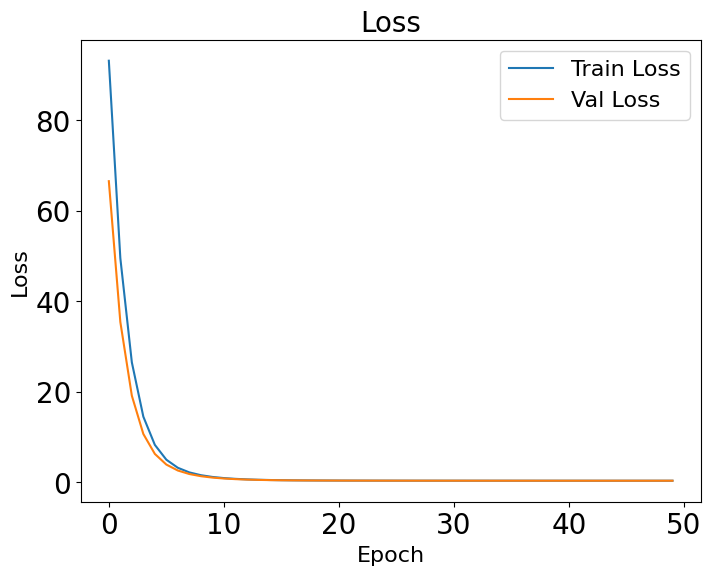

In [15]:
print("History 儲存的內容有：", History.history.keys())

Train_Loss = History.history["loss"]
Val_Loss = History.history["val_loss"]

# 繪製 loss 隨著 epoch 的曲線
plt.figure(figsize=(8,6))
plt.plot(Train_Loss, label="Train Loss")
plt.plot(Val_Loss, label="Val Loss")
plt.title("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

# 預測(機率)
tic = time()
DNN_Positive_Proba = DNN_model.predict(X_dev.to_numpy()).reshape(-1)
Threshold = 0.3
DNN_Decision = (DNN_Positive_Proba > Threshold).astype(int)
toc = time()
print(f"預測「機率」所花費時間為 {round(toc-tic)} (sec)\n")

# 分類模型表現(Note: 我們有使用的是自定義的 Threshold，才得到 DNN_Decision)
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, DNN_Decision)*100, 2)} %")
print(f"精確率(Precision): {round(precision_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")
print(f"召回率(Recall)): {round(recall_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
預測「機率」所花費時間為 4 (sec)

準確率(Accuracy)為：90.7 %
精確率(Precision): 54.79 %
召回率(Recall)): 39.5 %
F1分數(F1-Score): 45.91 %


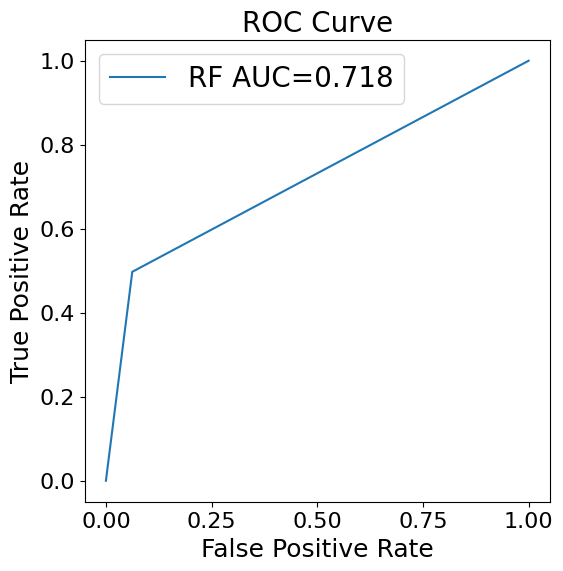

In [19]:
# 提示: roc_curve(Y_true, Positive_Probability, pos_label), auc(frp, tpr)

# 引入此部份所需套件
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 第一個模型
DNN_fpr, DNN_tpr, DNN_thresholds = roc_curve(Y_dev, DNN_Decision, pos_label=1)
DNN_AUC = auc(DNN_fpr, DNN_tpr)

# 繪製 ROC Curve
plt.figure(figsize=(6,6))
plt.plot(DNN_fpr, DNN_tpr, label=f"RF AUC={round(DNN_AUC,3)}")
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

In [20]:
test=pd.read_csv("test.csv")
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [21]:
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., target) 的缺失值有0筆
第2個欄位(i.e., var_0) 的缺失值有0筆
第3個欄位(i.e., var_1) 的缺失值有0筆
第4個欄位(i.e., var_2) 的缺失值有0筆
第5個欄位(i.e., var_3) 的缺失值有0筆
第6個欄位(i.e., var_4) 的缺失值有0筆
第7個欄位(i.e., var_5) 的缺失值有0筆
第8個欄位(i.e., var_6) 的缺失值有0筆
第9個欄位(i.e., var_7) 的缺失值有0筆
第10個欄位(i.e., var_8) 的缺失值有0筆
第11個欄位(i.e., var_9) 的缺失值有0筆
第12個欄位(i.e., var_10) 的缺失值有0筆
第13個欄位(i.e., var_11) 的缺失值有0筆
第14個欄位(i.e., var_12) 的缺失值有0筆
第15個欄位(i.e., var_13) 的缺失值有0筆
第16個欄位(i.e., var_14) 的缺失值有0筆
第17個欄位(i.e., var_15) 的缺失值有0筆
第18個欄位(i.e., var_16) 的缺失值有0筆
第19個欄位(i.e., var_17) 的缺失值有0筆
第20個欄位(i.e., var_18) 的缺失值有0筆
第21個欄位(i.e., var_19) 的缺失值有0筆
第22個欄位(i.e., var_20) 的缺失值有0筆
第23個欄位(i.e., var_21) 的缺失值有0筆
第24個欄位(i.e., var_22) 的缺失值有0筆
第25個欄位(i.e., var_23) 的缺失值有0筆
第26個欄位(i.e., var_24) 的缺失值有0筆
第27個欄位(i.e., var_25) 的缺失值有0筆
第28個欄位(i.e., var_26) 的缺失值有0筆
第29個欄位(i.e., var_27) 的缺失值有0筆
第30個欄位(i.e., var_28) 的缺失值有0筆
第31個欄位(i.e., var_29) 的缺失值有0筆
第32個欄位(i.e., var_30) 的缺失值有0筆
第33個欄位(i.e., var_31) 的缺失值有0筆
第34個欄位(i.e., var_32) 的缺失值有0筆
第35個欄位(i.e., var_33) 的缺失值有0筆
第36個

In [22]:
test=test.drop(["ID_code"], axis=1)

In [23]:
test_numerical = test[numerical_attributes]
x_scaler = StandardScaler().fit(test_numerical)
test_trans = x_scaler.transform(test_numerical)
test[numerical_attributes] = test_trans

In [24]:
test_pred = DNN_model.predict(test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step


In [28]:
Submission = pd.read_csv("sample_submission.csv")
Submission["target"] = test_pred[:,0]

In [30]:
Submission.to_csv("submission.csv", index=False)